# Supermesh

Author : Saman Hooshvar

## What is supermesh?

A supermesh occurs when a **current source** is contained between two essential meshes. The circuit is first treated as if the current source is not there. This leads to one equation that incorporates two mesh currents. Once this equation is formed, an equation is needed that relates the two mesh currents with the current source. This will be an equation where the current source is equal to one of the mesh currents minus the other. The following is a simple example of dealing with a supermesh.

## Comparing mesh and supermesh method

Consider the below circuit.

We want to find the mesh currents $ i1$ and $ i2$.

![circuit](supermesh-analysis-example-1a.jpg.webp)


### Solving the problem using mesh method

![circuit](supermesh-analysis-example-1b.jpg.webp)

#### By applying KVL to the first loop we have:

$ 21-6i_1-V_x=0 $

Rearranging for $ V_x$ we'll get,

$ V_x= 21 - 6i_1 $

#### Similarly, we will apply KVL at mesh 2.

$ V_x - 4i_2 + 5= 0$

Rearranging for $ V_x$ we'll get,

$ V_x=  4i_2 - 5 $

based on the above equations we have $ V_x$ in both the mesh equations. So we can equate the two equations to get a common mesh equation.

$21 - 6i_1  = 4i_2 - 5 $

We've still got two unknowns $ i_1$ and $ i_2$ in our equation, so we'll be needing another equation to solve it. 

#### in the current source branch we have:

$ i_1 - i_2 = 1$

Now we have two equations for the two unknowns. by replacing ($ i_1 = i_2 + 1$) we have:

$ 21 - 6i_2 + 6 = 4i_2 - 5$

**$ i_2 = 2A$**

and we can simply find $i_1 $ as well:

**$ i_1 = 3A$**


### Solving the problem using supermesh

In the "super-mesh" method, we start off by **removing the branch containing the current source which is common between any two meshes**. For us, it's the **middle branch** common between mesh 1 and mesh 2. So after removing it, we are left with a bigger loop containing both the mesh currents. This is called a **super-mesh.**

![updated-circuit](supermesh-analysis-example-1c.jpg.webp)

Now let's write a KVL equation for this super-mesh.

$ 21-6i_1-4i_2+5=0 $

**Dont forget that the current source branch which we removed** for making the "super-mesh" has an important role and that is to provide us with a relation between mesh currents which is necessary to solve the problem.

$ i_1-i_2=1$

$ i_1=1+i_2$

Now to substitue the values:

$ 21-6(1+i_2)-4i_2 +5=0$

$20-10i_2=0$

$i_2=2A $

We can now substitute this value of $ i_2$ in the equation to find $i_1 $

$ i_1=3A$

As we saw the supermesh method was much shorter and easier.


### Solving the circuit 

In this section we will first draw the circuit using shemedraw and then solve it.

#### Drawing the circuit using shemedraw

Below is an implementation of the circuit using shemedraw.

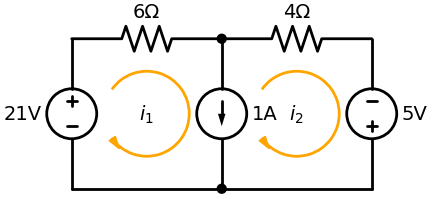

In [1]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing():
    V1 = elm.SourceV().label('21V')
    r1 = elm.Resistor().right().label('6Ω')
    elm.Dot()
    r2 = elm.Resistor().label('4Ω')
    V2 = elm.SourceV().down().label('5V' , loc = 'bot')
    line = elm.Line().left()
    elm.Dot()
    line2 = elm.Line()
    I = elm.SourceI().label('1A' , loc='bot').endpoints(r1.end , line.end)
    elm.LoopCurrent([V1 , r1 , I , line2] , direction = 'cw').label('$i_1$' , color = 'black').color('orange').scale(0.5)
    elm.LoopCurrent([I , r2 , V2 , line] , direction = 'cw').label('$i_2$' , color = 'black').color('orange').scale(0.5)



#### The code for finding $ i_1$ and $ i_2$

Here we try to find the currents by solving the equations.

In [15]:
import numpy as np
from scipy.linalg import solve

# Coefficient matrix (A) and constant matrix (B)
A = np.array([[6, 4],
              [1, -1]])

B = np.array([26, 1])  # Right-hand side of the equations

# Solve the system of equations
currents = solve(A, B)

# Assign currents to i1 and i2
i1, i2 = currents

print(f"Current i1: {i1:.2f} A")
print(f"Current i2: {i2:.2f} A")


Current i1: 3.00 A
Current i2: 2.00 A


## Example : Supermesh

solve the below circuit using the suoermesh method.

![updated-circuit](supermesh-analysis-example-2a.jpg.webp)

### Solution

We'll remove the branch containing the current source to get our super-mesh consisting of mesh 1 and mesh 3.

![updated-circuit](supermesh-analysis-example-2b.jpg.webp)

Mesh 2 with mesh current i2 stays as it is because it does not share any common branch with the current source. Now we can apply KVL in the super-mesh to get the following common mesh equation:

$ 8 - 2(i_1 - i_2) - 4(i_3 - i_2) - 2i_3 = 0$

$ 8 - 2i_1 + 6i_2 - 6i_3 = 0$

$ 8 = 2i_1 - 6i_2 + 6i_3$

Applying KVL in mesh 2 with current $i_2 $

$ -6i_2 - 4(i_2 - i_3) - 2(i_2 - i_1) = 0$

$12i_2 - 2i_1 - 4i_3 = 0 $

The branch we've removed will give us the third and most important equation, the relation between the two mesh currents. Because $ i_1$ supports the direction of $ 3A$ current due to the current source and $ i_3$ opposes it, we can express it as:

$ i_1 - i_3 = 3$

Now we have 3 equations and 3 unknowns:

$ 8 = 2i_1 - 6i_2 + 6i_3$

$12i_2 - 2i_1 - 4i_3 = 0 $

$ i_1 - i_3 = 3$

by solving these equations we have:

$ i_1 = 4A$

$ i_2 = 1A$

$ i_3 = 1A$



#### Drawing the circuit using shemedraw

Below is an implementation of the circuit using shemedraw.


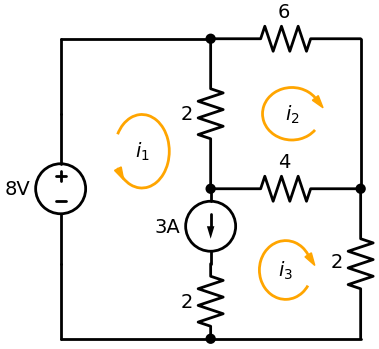

In [16]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    S = elm.SourceV().label('8V')
    L2 = elm.Line().length(1.5)
    L3 = elm.Line().at(S.start).down().length(1.5)
    L4 = elm.Line().right().at(L2.end)
    R1 = elm.Resistor().label('6').idot()
    L5 = elm.Line().down()
    R2 = elm.Resistor().tox(R1.start).dot().label('4')
    R3 = elm.Resistor().label('2').idot().at(R2.start).down()
    L6 = elm.Line().left()
    L1 = elm.Line().idot()
    R4 = elm.Resistor().endpoints(R1.start,R2.end).label('2')
    I = elm.SourceI().at(R2.end).down().length(1.5).label('3A')
    R5 = elm.Resistor().length(1.5).label('2')
    d+= elm.LoopCurrent([R1,L5,R2,R4], direction='cw').label('$i_2$',color='black').color('orange').scale(0.5)
    d+= elm.LoopCurrent([R2,R3,L6,R5,I], direction='cw').label('$i_3$',color='black').color('orange').scale(0.5)
    d+= elm.LoopCurrent([S,L2,L4,R4,I,R5,L1,L3], direction='cw').label('$i_1$',color='black').color('orange').scale(0.3)
	


#### The code for finding the $ i_1$ to $ i_3$ currents

Below is the implementation of finding the currents.

In [17]:
import numpy as np

# Resistance values (ohms)
R1 = 2  # 2Ω resistor
R2 = 6  # 6Ω resistor
R3 = 4  # 4Ω resistor
R4 = 2  # 2Ω resistor

# Voltage Source
V1 = 8  # 8V source

# Current Source
I_source = 3  # 3A current source

# Setting up the matrix equation Ax = B
A = np.array([[2 + 6, -6, 0],
              [-6, 6 + 4, -4],
              [0, -1, 1]])

B = np.array([8, 0, I_source])

# Solve for the mesh currents
currents = np.linalg.solve(A, B)

# Print results
i1, i2, i3 = currents
print(f"i1 = {i1:.2f} A")
print(f"i2 = {i2:.2f} A")
print(f"i3 = {i3:.2f} A")


i1 = 10.00 A
i2 = 12.00 A
i3 = 15.00 A


## Example 2

![updated-circuit](example.png)

We want to find the three unknown currents in the circuit.

### Solution

The current sources appear in meshes 1 and 3. Since the 15 A source is
located on the perimeter of the circuit, we may eliminate mesh 1 from
consideration—it is clear that $ i1 = 15A$.

We now know one of the two mesh currents
relevant to the dependent current source, **there is no need to write a supermesh equation about meshes 1 and 3**. Instead, we simply relate $i_1 $
and $ i_3$ to the current from the dependent source using KCL:

$ \frac{v_x}{9} = i_3 - i_1 = \frac{3(i_3 - i_2)}{9}$

which can be written more compactly as

$ -i_1 + \frac{1}{3} i_2 + \frac{2}{3} i_3 = 0$ 

 or 
 
**$ \frac{1}{3}i_2 + \frac{2}{3} i_3 = 15$**

With one equation in two unknowns, all that remains is to write a
KVL equation about mesh 2:

$ 1(i_2 - i_1) + 2i_2 + 3(i_2 - i_3) = 0$

or:

**$ 6i_2 - 3i_3 = 15$**

Now we have 2 equations and 2 unknowns by sloving them we will find that:

$ i_2 = 11A$

$ i_3 = 17A$

and we already knew that $ i_1 = 15A$

#### Conclusion

We realized that we dont neccessarily need to write supermesh equation instead we used nodal analysis.

## Example 3

![updated-circuit](example2.png)

in this example we want to find $V_3$ and Current $i_1$, $ i_2$ and $i_3 $ in the following fig?

### Solution

Using KVL on Mesh 1.

$ 80 = 10i_1 + 20(i_1 - i_2) + 30(i_1-i_3)$

by simplyfying we have equation number(1):

$ 80 = 60i_1 - 20i_2 - 30i_3$

**Forming the Supermesh** (which is integration of mesh 2 and mesh 3, but we have reduced it by single mesh which is known as supermesh)

![updated-circuit](example3.png)

we simply ignore the branch containing the independant current source.

Now to apply KVL on supermesh:

$ 30 = 40i_3 + 30(i_3-i_1) + 20(i_2-i_1)$

by simplyfying we have equation number(2):

$ 30 = 70i_3 - 50i_1 + 20i_2$

But here, we have three (3) variables i1, i2 and i3. And there are two equations. So we must need three equations as well.

The **independent current source** gives us equation number(3).

$15i_1 = i_3 - i_2$

$ i_3 = 15i_1 + i_2$

By solving equations (1), (2) and (3) we have:

$i_1 = 0.583A$

$ i_2 = -6.15A$

$ i_3 = 2.6A$

Also, we can find the value of V3,

$V_3 = i_3 x R_3$

Putting the values,

$ V_3 = 2.6A x 40Ω$

$ v_3 = 104V$

#### The code for finding the $ i_1$ to $ i_3$ currents

Below is the implementation of finding the currents.

In [5]:
import numpy as np

# Coefficients matrix
A = np.array([[60, -20, -30],
              [-50, 20, 70],
              [15, 1, -1]])

# Constants vector
B = np.array([80, 30, 0])  # Since i3 - i2 = 15ix, we can set ix to 0 for this calculation.

# Solve the system of equations
solution = np.linalg.solve(A, B)

# Extracting the currents
i1, i2, i3 = solution

# Calculate V3
R3 = 40  # Ohms
V3 = i3 * R3

print(f"i1 = {i1:.3f} A")
print(f"i2 = {i2:.3f} A")
print(f"i3 = {i3:.3f} A")
print(f"V3 = {V3:.3f} V")


i1 = 0.584 A
i2 = -6.154 A
i3 = 2.604 A
V3 = 104.161 V


## Summary of supermesh analysis procedure

1. **Determine if the circuit is a planar circuit**. If not, perform nodal
analysis instead.

2. **Count the number of meshes (M)**. Redraw the circuit if necessary.

3. **Label each of the M mesh currents**. Generally, defining all mesh
currents to flow clockwise results in a simpler analysis. 

4. **If the circuit contains current sources shared by two meshes,form a supermesh to enclose both meshes**. A highlighted enclosure helps when writing KVL equations.

5. **Write a KVL equation around each mesh/supermesh**. Begin
with a convenient node and proceed in the direction of the mesh
current. Pay close attention to “−” signs.

6. **Relate the current flowing from each current source to meshcurrents**. 
This is accomplished by simple application of KCL;
one such equation is needed for each supermesh defined.

7. **Express any additional unknowns such as voltages or currentsother than mesh currents in terms of appropriate mesh currents**. 
This situation can occur if dependent sources appear in
our circuit. 

8. **Organize the equations**. Group terms according to nodal voltages.

9. **Solve the system of equations for the mesh currents** (there will
be M of them)

## Conclusion

In conclusion, the supermesh analysis technique is a powerful tool in circuit theory that simplifies the process of solving complex electrical networks. By strategically applying Kirchhoff's Voltage Law (KVL) to supermeshes—formed by combining mesh loops that share a current source—engineers and students can efficiently analyze circuits without the need for cumbersome node voltage methods. This approach not only streamlines calculations but also enhances understanding of current flow and voltage distribution within a circuit. As electrical systems become increasingly intricate, mastering supermesh analysis equips practitioners with the skills needed to tackle real-world challenges, ultimately leading to more efficient designs and innovations in the field of electronics.

### Refrences

1 - ENGINEERING CIRCUIT ANALYSIS(William H. Hayt, Jr. (deceased))

2 - https://www.electricaltechnology.org/2015/01/supermesh-circuit-analysis-step-step-solved-example.html#google_vignette

3 - https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.circuitbread.com/tutorials/special-case-of-kvl-supermesh-analysis&ved=2ahUKEwjF4bPez6GJAxUHQ6QEHTXQBVAQFnoECBsQAQ&usg=AOvVaw3k55rwd7gcijpRTLZhC7XE